## Importing neccessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pickle

## Loading the Dataset

In [2]:
path = 'C:/Users/user/Desktop/Crop reccommender/Crop Recommendation dataset/Train Dataset.csv'
data = pd.read_csv(path)
df = pd.DataFrame(data)
df.head()

,Unnamed: 0,Crop,N,P,K,pH,rainfall,temperature
0,10182,barley,70,40,45,5.54,75.32,22.676000
1,16280,sunflower,50,60,30,5.54,297.66,29.566667
2,54944,sweetpotato,90,20,120,5.02,689.88,29.037273
3,98212,rice,80,40,40,5.66,297.66,29.566667
4,52108,soyabean,20,60,20,5.38,1011.49,30.430000


## Cleaning the dataset

In [3]:
df =  df.drop('Unnamed: 0', axis=1)
df.head()

,Crop,N,P,K,pH,rainfall,temperature
0,barley,70,40,45,5.54,75.32,22.676000
1,sunflower,50,60,30,5.54,297.66,29.566667
2,sweetpotato,90,20,120,5.02,689.88,29.037273
3,rice,80,40,40,5.66,297.66,29.566667
4,soyabean,20,60,20,5.38,1011.49,30.430000


In [4]:
# Checking for missing values
missing_values = df.isnull().sum()
print("Missing Values per Column:\n", missing_values)

Missing Values per Column:
 Crop           0
N              0
P              0
K              0
pH             0
rainfall       0
temperature    0
dtype: int64


In [5]:
df.describe()

,N,P,K,pH,rainfall,temperature
count,18079.000000,18079.000000,18079.000000,18079.000000,18079.000000,18079.000000
mean,72.683500,43.489408,41.607666,5.581247,661.896078,26.496760
std,40.019864,14.051089,27.584765,0.477354,578.161909,4.970138
min,10.000000,10.000000,10.000000,3.820000,3.274569,1.180000
25%,50.000000,40.000000,20.000000,5.340000,127.680000,22.890909
50%,80.000000,40.000000,30.000000,5.500000,579.750000,26.736364
75%,80.000000,60.000000,50.000000,5.680000,1037.320000,29.186364
max,180.000000,125.000000,200.000000,7.000000,3322.060000,35.346667


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18079 entries, 0 to 18078
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Crop         18079 non-null  object 
 1   N            18079 non-null  int64  
 2   P            18079 non-null  int64  
 3   K            18079 non-null  int64  
 4   pH           18079 non-null  float64
 5   rainfall     18079 non-null  float64
 6   temperature  18079 non-null  float64
dtypes: float64(3), int64(3), object(1)
memory usage: 988.8+ KB


In [7]:
# Checking for duplicates
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
18074     True
18075    False
18076     True
18077     True
18078    False
Length: 18079, dtype: bool

In [8]:
# Dropping duplicate values
df = df.drop_duplicates()

In [9]:
df.shape

(7165, 7)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7165 entries, 0 to 18078
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Crop         7165 non-null   object 
 1   N            7165 non-null   int64  
 2   P            7165 non-null   int64  
 3   K            7165 non-null   int64  
 4   pH           7165 non-null   float64
 5   rainfall     7165 non-null   float64
 6   temperature  7165 non-null   float64
dtypes: float64(3), int64(3), object(1)
memory usage: 447.8+ KB


In [11]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
18051    False
18065    False
18072    False
18075    False
18078    False
Length: 7165, dtype: bool

### Missing data and Duplicates Analysis
The dataset has no missing values which is a good thing.
The dataset however had duplicates which have been removed to reduce redundancy and provide chances for training a better model.

## Exploratory Data Analysis 

In [12]:
# Determining the Number of unique crops
crops = df['Crop'].value_counts()
print('The number of crops in the dataset is: ', crops)

The number of crops in the dataset is:  Crop
rice           792
maize          668
moong          529
potato         461
onion          383
jowar          367
sunflower      362
rapeseed       361
cotton         297
ragi           293
horsegram      272
wheat          264
turmeric       259
sweetpotato    241
banana         233
soyabean       196
barley         192
coriander      190
garlic         180
jute            99
blackpepper     71
mango           53
papaya          48
tomato          43
brinjal         43
cardamom        41
ladyfinger      32
pineapple       24
orange          23
cabbage         21
grapes          18
cauliflower     18
jackfruit       16
cucumber        14
drumstick       14
bottlegourd     11
radish          11
blackgram        9
bittergourd      9
pumpkin          7
Name: count, dtype: int64


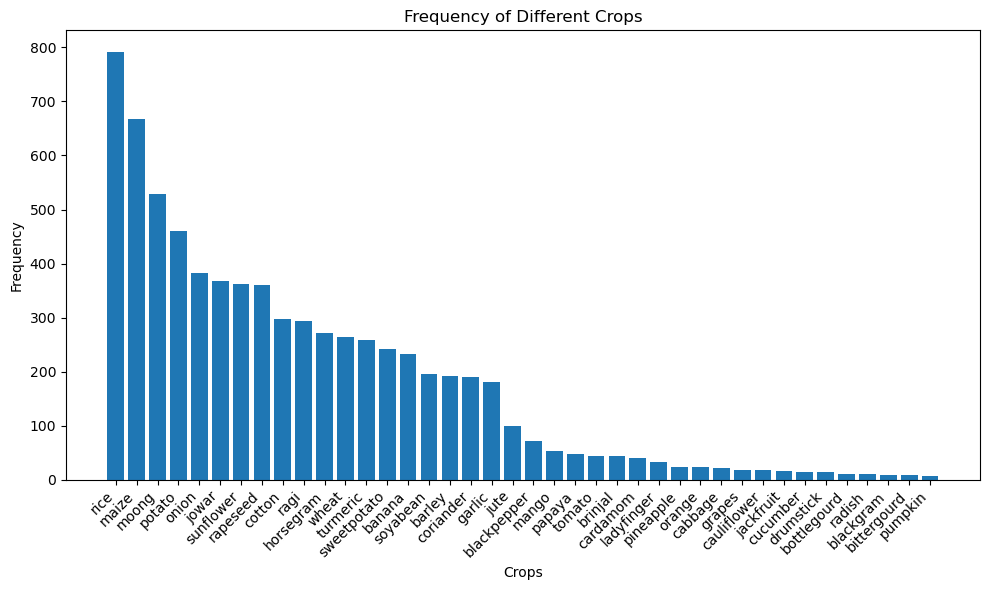

In [13]:
# Get the category names and their counts
categories = crops.index
counts = crops.values

# Create the bar plot
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.bar(categories, counts)

# Add labels and title
plt.xlabel('Crops')
plt.ylabel('Frequency')
plt.title('Frequency of Different Crops')

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.tight_layout()  # Adjust layout to prevent labels from being cut off
plt.show()

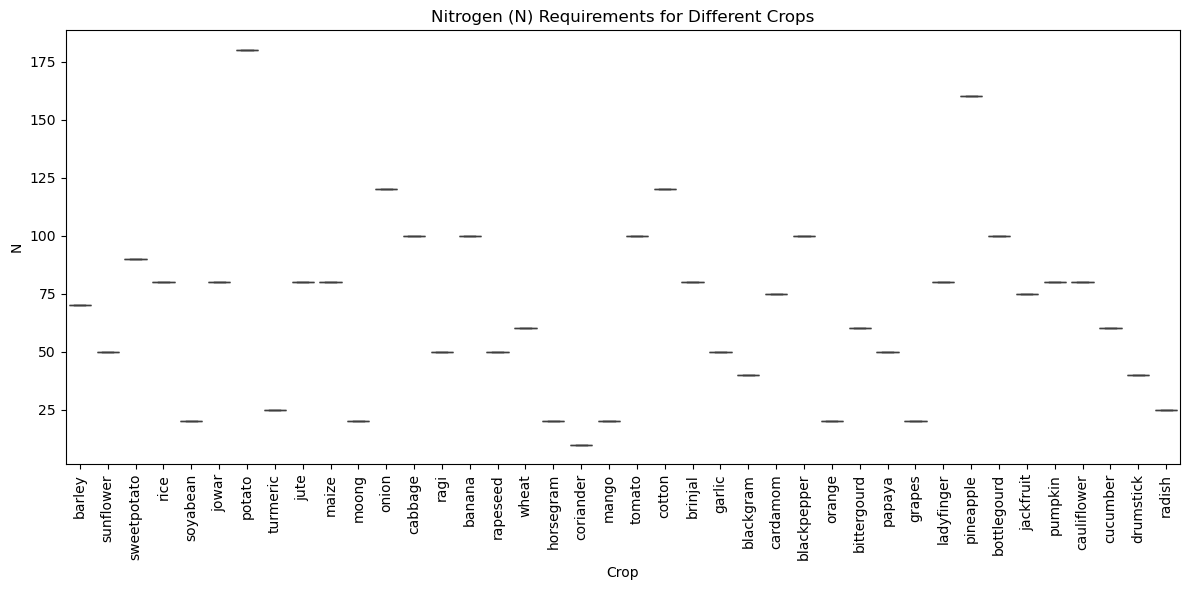

In [14]:
# Average Nitrogen nutrient Requirements for Different Crops
plt.figure(figsize=(12, 6))
sns.boxplot(x='Crop', y='N', data=df)
plt.xticks(rotation=90)
plt.title('Nitrogen (N) Requirements for Different Crops')
plt.tight_layout()
plt.show()

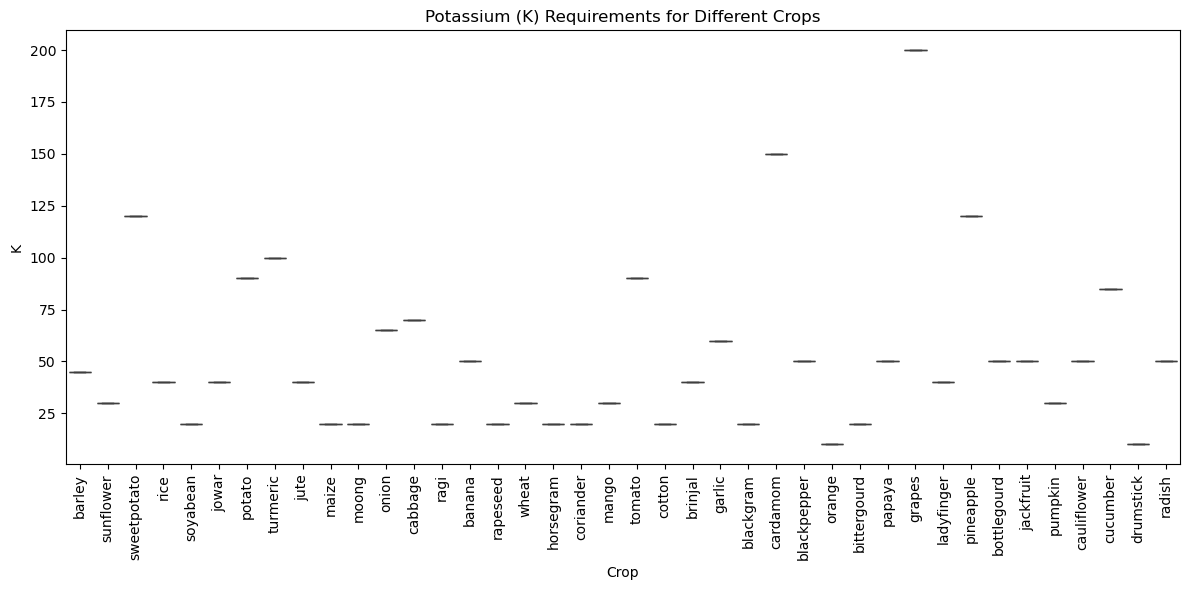

In [15]:
# Average Potassium nutrient Requirements for Different Crops
plt.figure(figsize=(12, 6))
sns.boxplot(x='Crop', y='K', data=df)
plt.xticks(rotation=90)
plt.title('Potassium (K) Requirements for Different Crops')
plt.tight_layout()
plt.show()

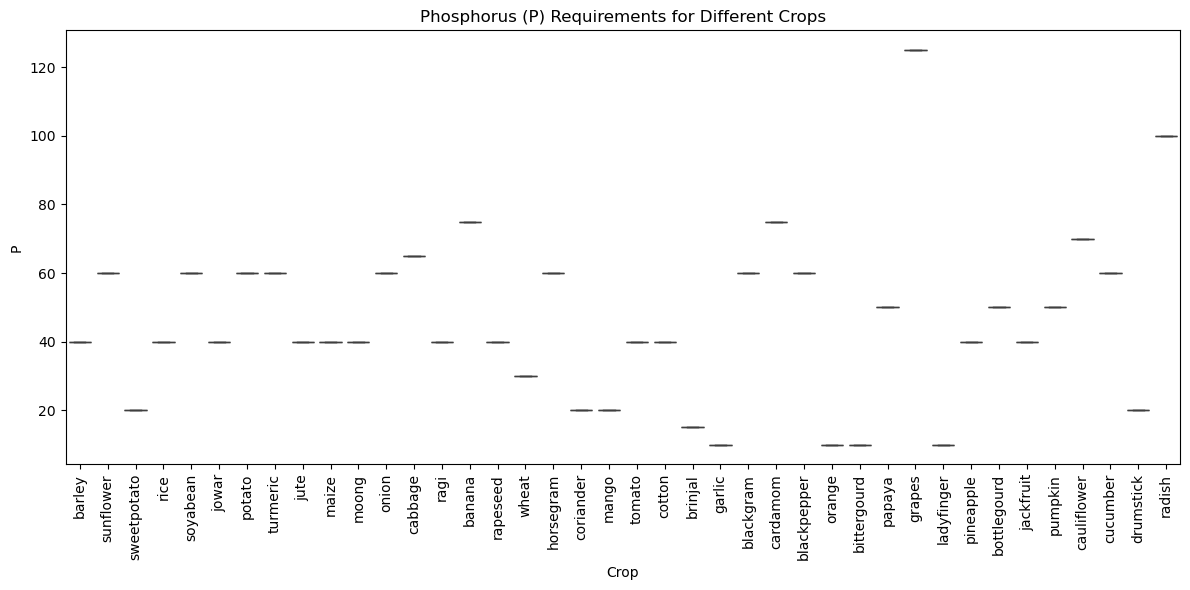

In [16]:
# Average Phosphorus nutrient Requirements for Different Crops
plt.figure(figsize=(12, 6))
sns.boxplot(x='Crop', y='P', data=df)
plt.xticks(rotation=90)
plt.title('Phosphorus (P) Requirements for Different Crops')
plt.tight_layout()
plt.show()

### Distributions for different Crops

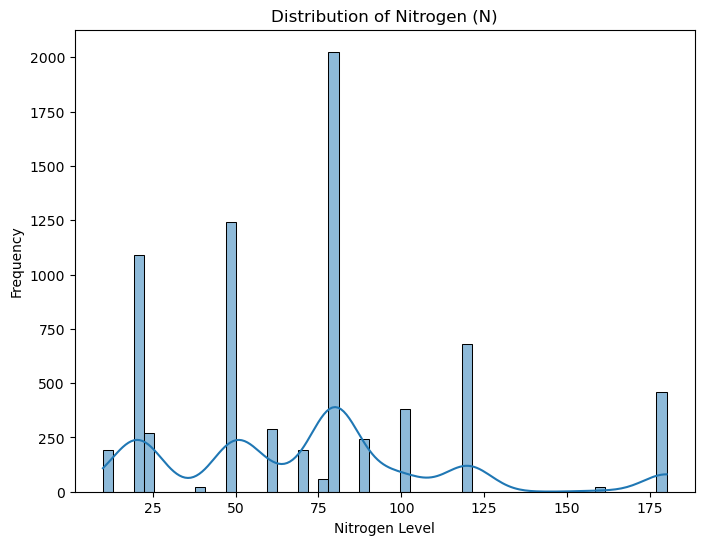

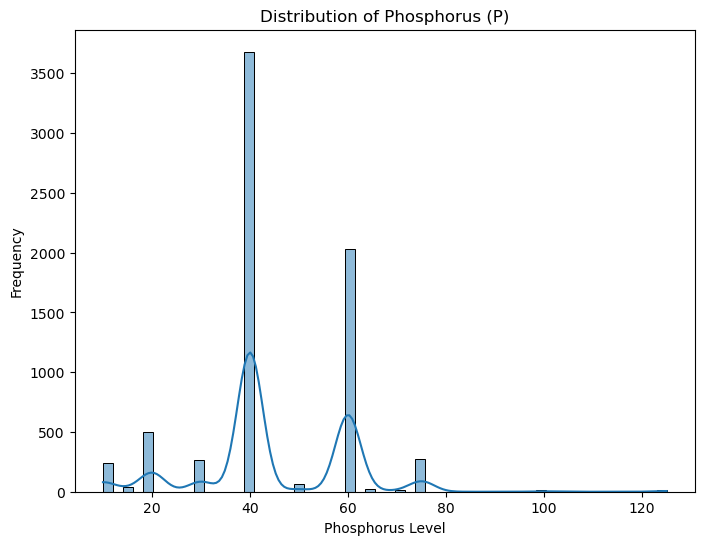

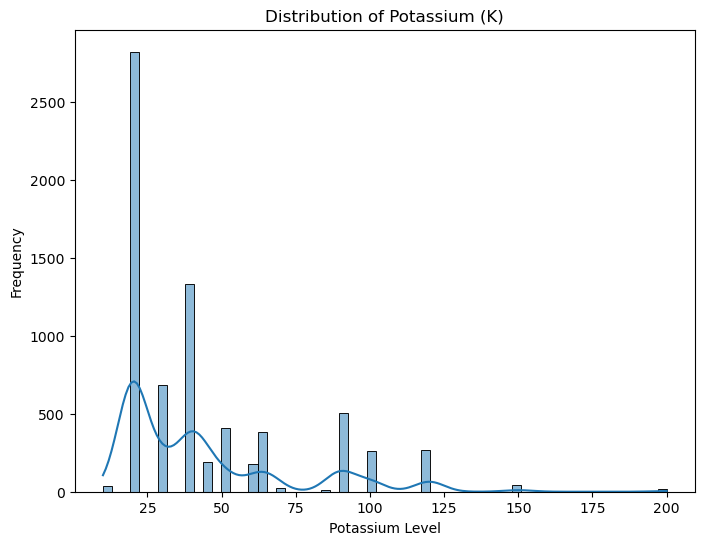

In [17]:
# Histogram for Nitrogen (N)
plt.figure(figsize=(8, 6))
sns.histplot(df['N'], kde=True)  # kde=True adds a kernel density estimate line
plt.title('Distribution of Nitrogen (N)')
plt.xlabel('Nitrogen Level')
plt.ylabel('Frequency')
plt.show()

# Histogram for Phosphorus (P)
plt.figure(figsize=(8, 6))
sns.histplot(df['P'], kde=True)
plt.title('Distribution of Phosphorus (P)')
plt.xlabel('Phosphorus Level')
plt.ylabel('Frequency')
plt.show()

# Histogram for Potassium (K)
plt.figure(figsize=(8, 6))
sns.histplot(df['K'], kde=True)
plt.title('Distribution of Potassium (K)')
plt.xlabel('Potassium Level')
plt.ylabel('Frequency')
plt.show()

### Analysis on nutrients
Analysis of Skewness for All Variables
Skewness measures asymmetry in the distribution of data:

Positive skew (>0) → Right-skewed (long right tail)
Negative skew (<0) → Left-skewed (long left tail)
Near zero (~0) → Symmetric (normal distribution)
Modality: How many peaks does the distribution have? Unimodal (one peak), bimodal (two peaks), or multimodal (multiple peaks)? This can suggest different underlying groups within the data.
#### Nitrogen (N)
It has a normal distribution with most crops requiring nitrogen levels of between 75 and 100.
Max nitrogen is just above 175 which can be a potential outlier and can affect model training

Modality: It seems Nitrogen has many peaks(5), showing different groups of crops with different nitrogen consumption levels
#### Potassium (K)
Potassium dataset seems to be left-skewed. It also means that most crops require a low level/amount of potassium
Left-skewed data pulls the mean down, leading to underestimation of true central tendency.
It reduces variance, making it hard for some models to learn.

Modality: It seems potassium has one peaks, showing almost average consumption of potassium over different crops.
#### Phosphorus (P)
it appears to be normally distributed.

Modality: It seems Phosphorus has 2 peaks, showing different groups of crops with different phosphorus consumption levels

### Box Plots for Different Nutrients


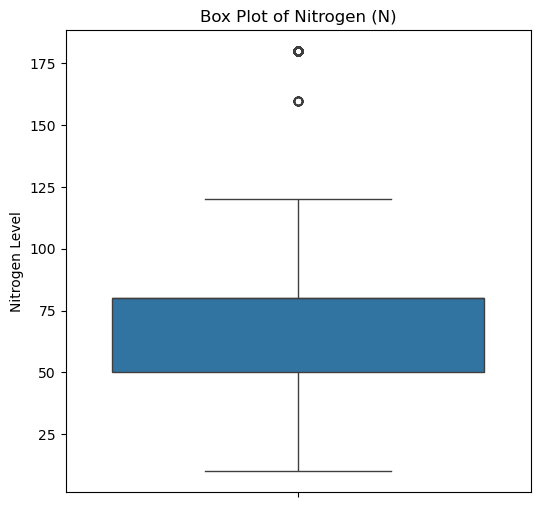

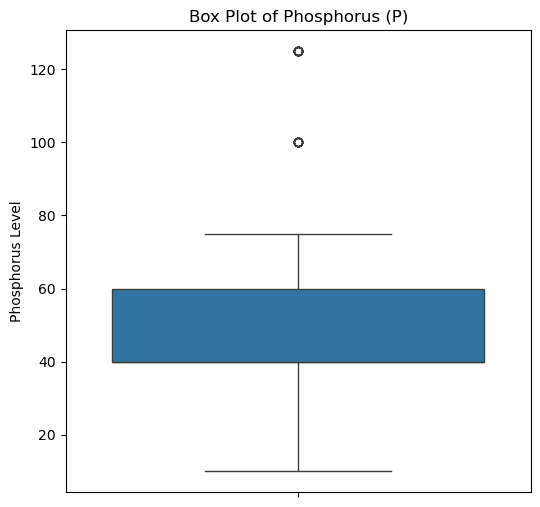

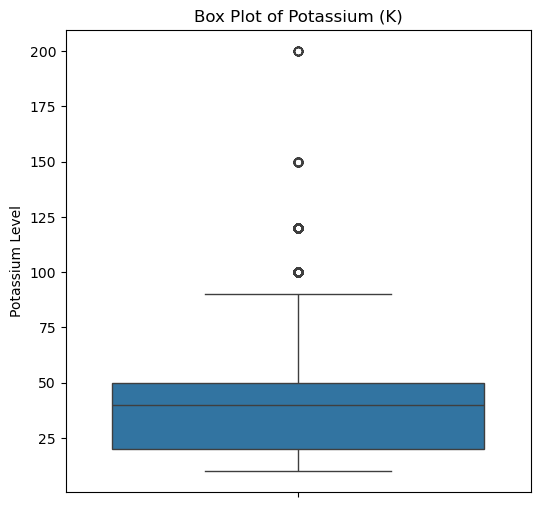

In [18]:
# Box Plot for Nitrogen (N)
plt.figure(figsize=(6, 6))
sns.boxplot(y=df['N'])
plt.title('Box Plot of Nitrogen (N)')
plt.ylabel('Nitrogen Level')
plt.show()

# Box Plot for Phosphorus (P)
plt.figure(figsize=(6, 6))
sns.boxplot(y=df['P'])
plt.title('Box Plot of Phosphorus (P)')
plt.ylabel('Phosphorus Level')
plt.show()

# Box Plot for Potassium (K)
plt.figure(figsize=(6, 6))
sns.boxplot(y=df['K'])
plt.title('Box Plot of Potassium (K)')
plt.ylabel('Potassium Level')
plt.show()

### Analysis of box plots
Range of each nutrient 
    N: Mainly between 10 and 125 with a few outlier crops visible
    P: Mainly between 10 and 80 with a few outlier crops visible
    K: Mainly between 20 and 90 with a few outlier crops visible
Potassium has a lower median compared to other nutrients
Nitrogen has the largest variability
There are obvious outliers in the nutrient levels but they don't need further handling

In [19]:
df.groupby('Crop')['rainfall'].describe()

,count,mean,std,min,25%,50%,75%,max
Crop,,,,,,,,
banana,233.0,1175.849680,705.353466,34.810000,810.260000,1037.3200,1350.025000,3322.0600
barley,192.0,172.567656,272.697099,19.380000,70.598000,87.2000,169.820000,1501.9800
bittergourd,9.0,1684.128333,873.865980,884.500000,884.500000,1350.0250,2817.860000,2817.8600
blackgram,9.0,523.668889,375.668045,127.680000,127.680000,840.4600,840.460000,840.4600
blackpepper,71.0,1829.250894,844.191802,56.236000,1050.245000,2169.3200,2817.860000,3322.0600
bottlegourd,11.0,1006.884091,132.485677,884.500000,913.650000,1037.3200,1037.320000,1350.0250
brinjal,43.0,1266.245174,548.117935,884.500000,942.800000,1111.6800,1350.025000,2817.8600
cabbage,21.0,1078.526429,142.183776,884.500000,942.800000,1111.6800,1111.680000,1350.0250
cardamom,41.0,1707.447500,849.100941,207.550000,884.500000,1603.2375,2817.860000,2817.8600


In [20]:
df.groupby('Crop')['temperature'].describe()

,count,mean,std,min,25%,50%,75%,max
Crop,,,,,,,,
banana,233.0,26.899563,3.089082,18.778182,26.018182,27.909091,29.037273,34.666667
barley,192.0,20.368670,4.635862,10.380000,18.920000,22.380000,23.106000,28.648182
bittergourd,9.0,27.193939,0.888680,26.018182,26.018182,27.654545,27.909091,27.909091
blackgram,9.0,27.901852,6.737408,20.800000,20.800000,33.583333,33.583333,33.583333
blackpepper,71.0,25.035818,3.233496,15.852000,22.890909,23.736364,27.909091,29.400000
bottlegourd,11.0,27.943636,0.791352,26.018182,27.654545,28.081818,28.081818,28.994545
brinjal,43.0,27.497759,1.842753,22.890909,27.654545,28.081818,28.648182,28.994545
cabbage,21.0,28.099091,0.967040,26.018182,27.654545,28.648182,28.648182,28.994545
cardamom,41.0,26.120473,2.267751,22.890909,22.890909,27.654545,27.909091,27.909091


### Analysis of temparature
Most crops operate on a temp of an average of between 20 - 26 degrees celcius. Wheat and blackgram have a high standard deviation which means they can stand a wide range of temparatures while some crops have a low standard deviation meaning they operate in a small range of temperature conditions.   

In [21]:
df.groupby('Crop')['pH'].describe()

,count,mean,std,min,25%,50%,75%,max
Crop,,,,,,,,
banana,233.0,6.492361,0.112503,6.32,6.400,6.50,6.600,6.68
barley,192.0,5.492917,0.109697,5.32,5.400,5.50,5.580,5.68
bittergourd,9.0,6.511111,0.126535,6.32,6.420,6.46,6.620,6.68
blackgram,9.0,4.993333,0.116619,4.84,4.920,4.98,5.060,5.18
blackpepper,71.0,4.996901,0.111132,4.82,4.900,4.98,5.090,5.18
bottlegourd,11.0,6.474545,0.105106,6.32,6.390,6.50,6.550,6.62
brinjal,43.0,6.517209,0.099195,6.32,6.440,6.52,6.590,6.68
cabbage,21.0,6.480000,0.106583,6.32,6.380,6.48,6.580,6.66
cardamom,41.0,5.006341,0.106343,4.82,4.920,5.02,5.100,5.18


### Analysis of pH
Wheat seems to have a wider range of pH tolerance. All crops in our dataset operate in slightly acidic to neutral pH soils. 


### Correlation

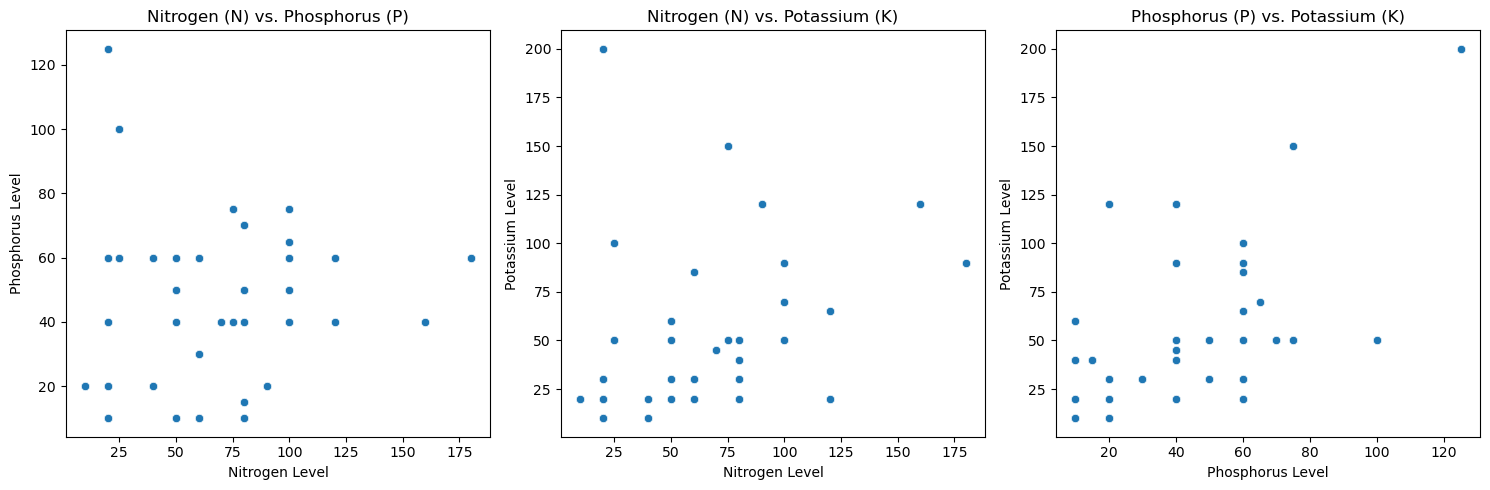

In [22]:
# 1. Scatter Plots for Nutrient Pairs
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.scatterplot(data=df, x='N', y='P')
plt.title('Nitrogen (N) vs. Phosphorus (P)')
plt.xlabel('Nitrogen Level')
plt.ylabel('Phosphorus Level')

plt.subplot(1, 3, 2)
sns.scatterplot(data=df, x='N', y='K')
plt.title('Nitrogen (N) vs. Potassium (K)')
plt.xlabel('Nitrogen Level')
plt.ylabel('Potassium Level')

plt.subplot(1, 3, 3)
sns.scatterplot(data=df, x='P', y='K')
plt.title('Phosphorus (P) vs. Potassium (K)')
plt.xlabel('Phosphorus Level')
plt.ylabel('Potassium Level')

plt.tight_layout()
plt.show()

### Analysis of scatter plots
There is no obvious relationshipas points seems to be randomly distributed. HOwever, for N vs K, a linear relationship can ve drawn i.e as nitrogen increases, potassium increases too

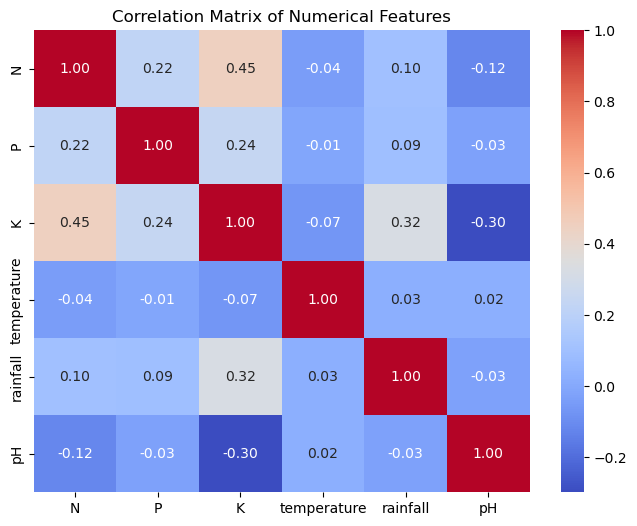

In [23]:
# Correlation plot
numerical_cols = ['N', 'P', 'K', 'temperature', 'rainfall', 'pH']
correlation_matrix = df[numerical_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

### Analysis of correlation heatmap
Strong positive or negative correlations: These suggest a notable linear relationship between the variables.(N and K)
Correlations close to zero: These indicate a weak or no linear relationship.

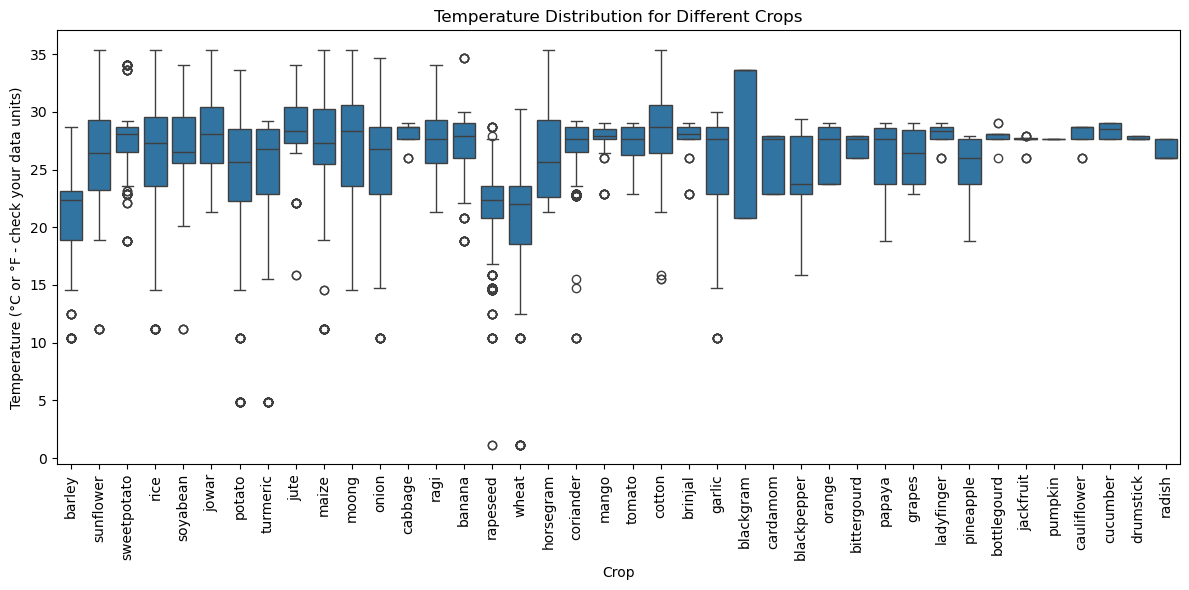

In [24]:
# Box Plot of Temperature vs. Crop
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Crop', y='temperature')
plt.title('Temperature Distribution for Different Crops')
plt.xlabel('Crop')
plt.ylabel('Temperature (°C or °F - check your data units)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()



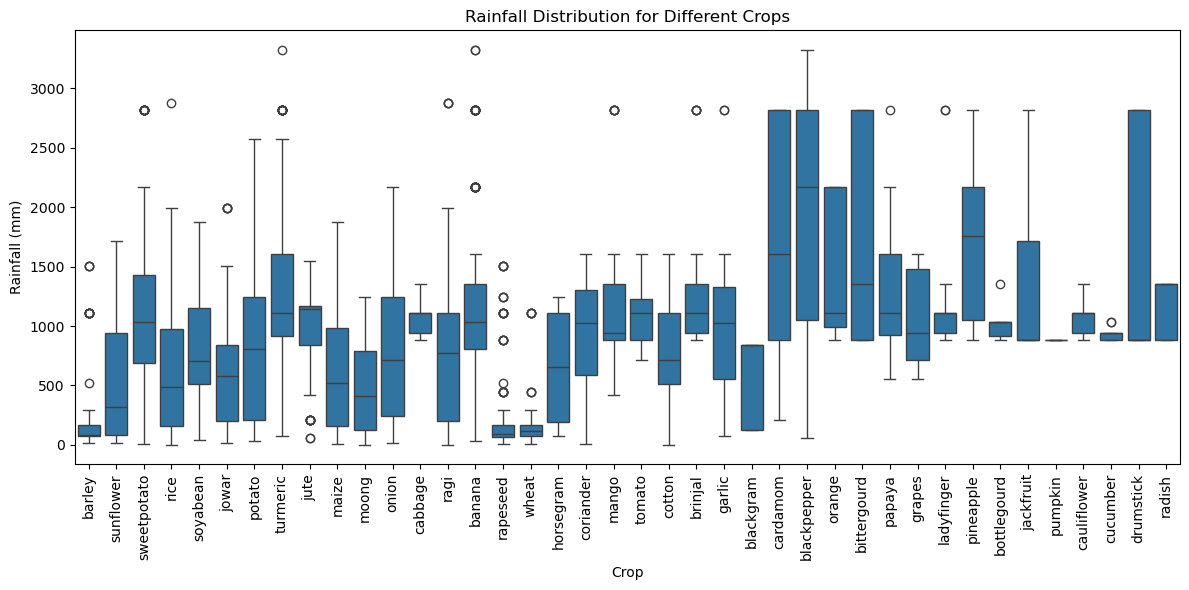

In [25]:
# Box Plot of Rainfall vs. Crop
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Crop', y='rainfall')
plt.title('Rainfall Distribution for Different Crops')
plt.xlabel('Crop')
plt.ylabel('Rainfall (mm)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

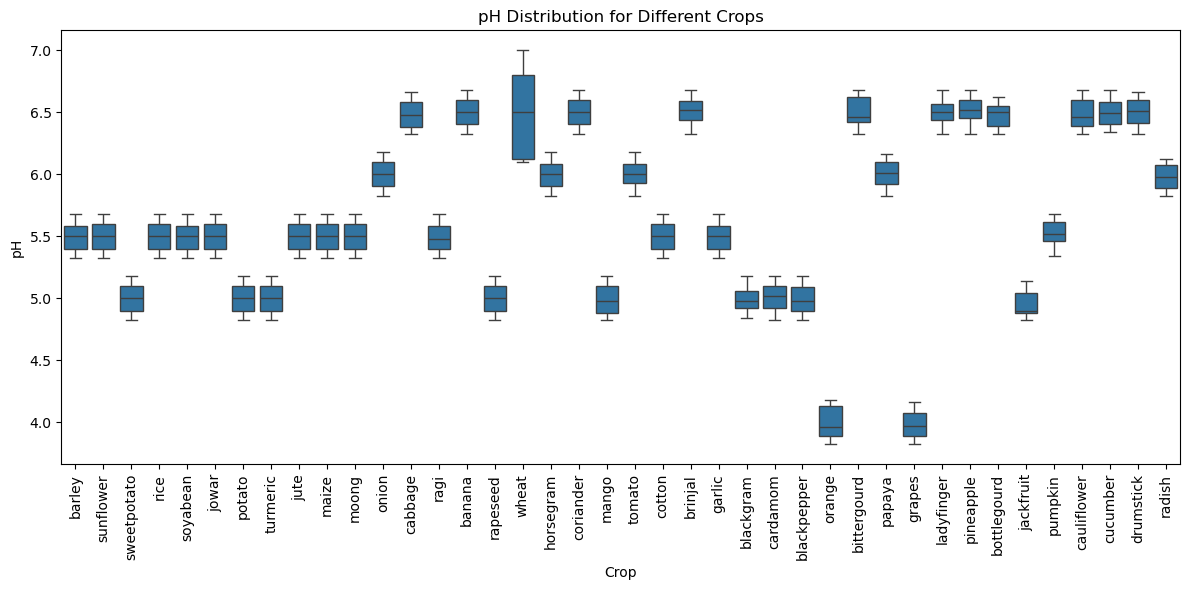

In [26]:
# Box Plot of pH vs. Crop
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Crop', y='pH')
plt.title('pH Distribution for Different Crops')
plt.xlabel('Crop')
plt.ylabel('pH')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

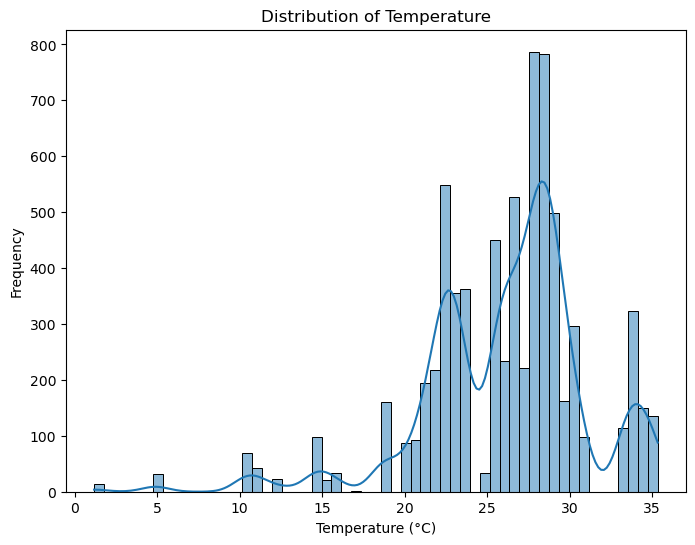

In [27]:
plt.figure(figsize=(8, 6))
sns.histplot(df['temperature'], kde=True)
plt.title('Distribution of Temperature')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.show()

Temparature is right-skewed with most crops thriving under temparature of between 20 - 37 degrees celcius. Right-skewed data pulls the mean up, leading to overestimation of true central tendency. It increases variance, making it hard for some models to learn.

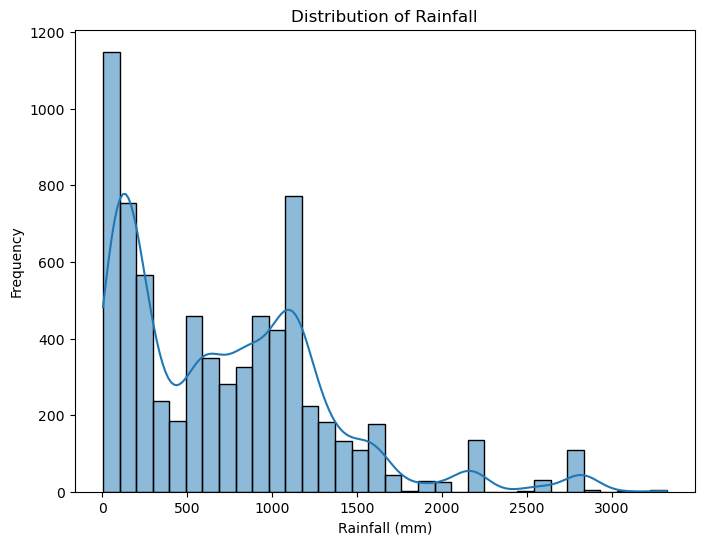

In [28]:
plt.figure(figsize=(8, 6))
sns.histplot(df['rainfall'], kde=True)
plt.title('Distribution of Rainfall')
plt.xlabel('Rainfall (mm)')
plt.ylabel('Frequency')
plt.show()

Rainfall dataset seems to be left-skewed with most crops thriving under rainfall of between 0 - 1500mm. Left-skewed data pulls the mean down, leading to underestimation of true central tendency. It reduces variance, making it hard for some models to learn.

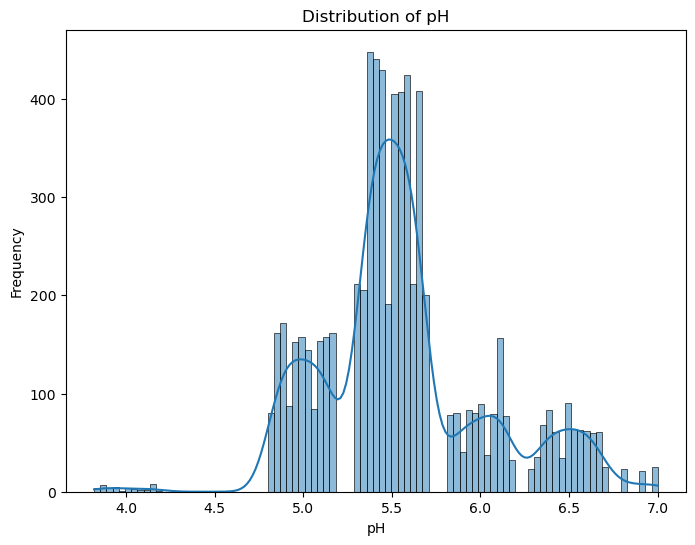

In [29]:
plt.figure(figsize=(8, 6))
sns.histplot(df['pH'], kde=True)
plt.title('Distribution of pH')
plt.xlabel('pH')
plt.ylabel('Frequency')
plt.show()

pH is normally distributed with most crops thriving under slightly acidic soil conditions

## Data Preprocessing for Model Training 

In [30]:
X = df.drop('Crop',axis=1)
y = df['Crop']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the training target
y_train_encoded = label_encoder.fit_transform(y_train)

#Transform the test target using the fitted encoder
y_test_encoded = label_encoder.transform(y_test)

# mapping crop to its label
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Label mapping for crops:", label_mapping)

# Applyingstandard scaler to numerical data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Label mapping for crops: {'banana': 0, 'barley': 1, 'bittergourd': 2, 'blackgram': 3, 'blackpepper': 4, 'bottlegourd': 5, 'brinjal': 6, 'cabbage': 7, 'cardamom': 8, 'cauliflower': 9, 'coriander': 10, 'cotton': 11, 'cucumber': 12, 'drumstick': 13, 'garlic': 14, 'grapes': 15, 'horsegram': 16, 'jackfruit': 17, 'jowar': 18, 'jute': 19, 'ladyfinger': 20, 'maize': 21, 'mango': 22, 'moong': 23, 'onion': 24, 'orange': 25, 'papaya': 26, 'pineapple': 27, 'potato': 28, 'pumpkin': 29, 'radish': 30, 'ragi': 31, 'rapeseed': 32, 'rice': 33, 'soyabean': 34, 'sunflower': 35, 'sweetpotato': 36, 'tomato': 37, 'turmeric': 38, 'wheat': 39}


## Training Different models

In [31]:
# Initialize models
logistic_model = LogisticRegression(random_state=42, solver='liblinear')
tree_model = DecisionTreeClassifier(random_state=42)
forest_model = RandomForestClassifier(random_state=42, n_estimators=100)
naive_bayes_model = GaussianNB()
svm_model = SVC(random_state=42)

# Train models
logistic_model.fit(X_train_scaled, y_train_encoded)
tree_model.fit(X_train_scaled, y_train_encoded)
forest_model.fit(X_train_scaled, y_train_encoded)
naive_bayes_model.fit(X_train_scaled, y_train_encoded)
svm_model.fit(X_train_scaled, y_train_encoded)

print("Models trained!")

Models trained!


## Making Predictions

In [32]:
logistic_predictions = logistic_model.predict(X_test_scaled)
tree_predictions = tree_model.predict(X_test_scaled)
forest_predictions = forest_model.predict(X_test_scaled)
naive_bayes_predictions = naive_bayes_model.predict(X_test_scaled)
svm_predictions = svm_model.predict(X_test_scaled)

print("Predictions made!")

Predictions made!


## Evaluating Models

----- Logistic Regression Evaluation -----
Accuracy: 0.8262

Classification Report:
              precision    recall  f1-score   support

      potato       1.00      1.00      1.00        81
       jowar       0.00      0.00      0.00        75
   sunflower       0.90      1.00      0.95        75
   horsegram       1.00      1.00      1.00        57
       onion       0.83      1.00      0.91        93
    cardamom       1.00      0.60      0.75         5
      banana       0.98      1.00      0.99        50
        rice       0.53      1.00      0.69       150
       wheat       0.96      1.00      0.98        47
      barley       1.00      0.32      0.49        37
   coriander       1.00      0.97      0.98        31
      cotton       1.00      1.00      1.00        55
       moong       0.91      1.00      0.95       127
    rapeseed       0.92      0.95      0.93        58
       mango       1.00      0.09      0.17        11
    turmeric       0.90      1.00      0.95        

C:\Users\user\anaconda3\envs\Datahaul\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\user\anaconda3\envs\Datahaul\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\user\anaconda3\envs\Datahaul\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


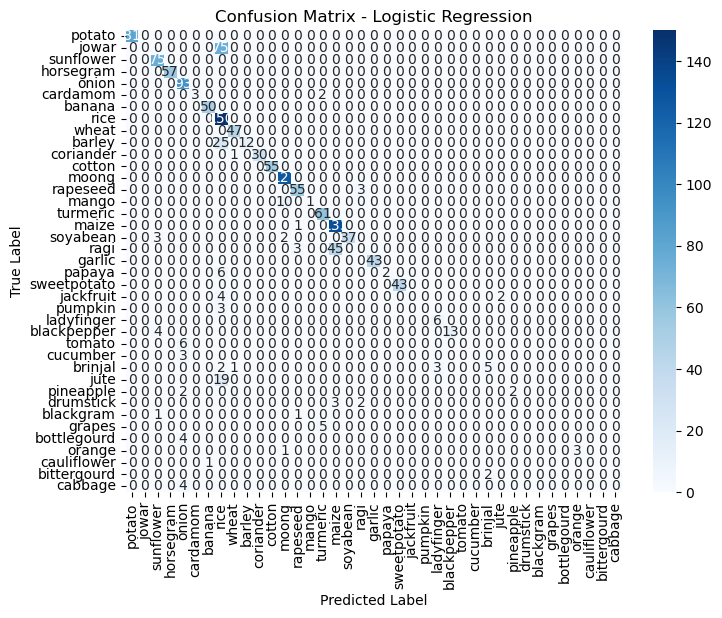



----- Decision Tree Evaluation -----
Accuracy: 0.9009

Classification Report:
              precision    recall  f1-score   support

      potato       1.00      1.00      1.00        81
       jowar       0.27      0.37      0.32        75
   sunflower       1.00      1.00      1.00        75
   horsegram       1.00      1.00      1.00        57
       onion       1.00      1.00      1.00        93
    cardamom       1.00      1.00      1.00         5
      banana       1.00      1.00      1.00        50
        rice       0.58      0.46      0.51       150
       wheat       1.00      1.00      1.00        47
      barley       1.00      1.00      1.00        37
   coriander       1.00      1.00      1.00        31
      cotton       1.00      1.00      1.00        55
       moong       1.00      1.00      1.00       127
    rapeseed       1.00      1.00      1.00        58
       mango       1.00      1.00      1.00        11
    turmeric       1.00      1.00      1.00        61
 

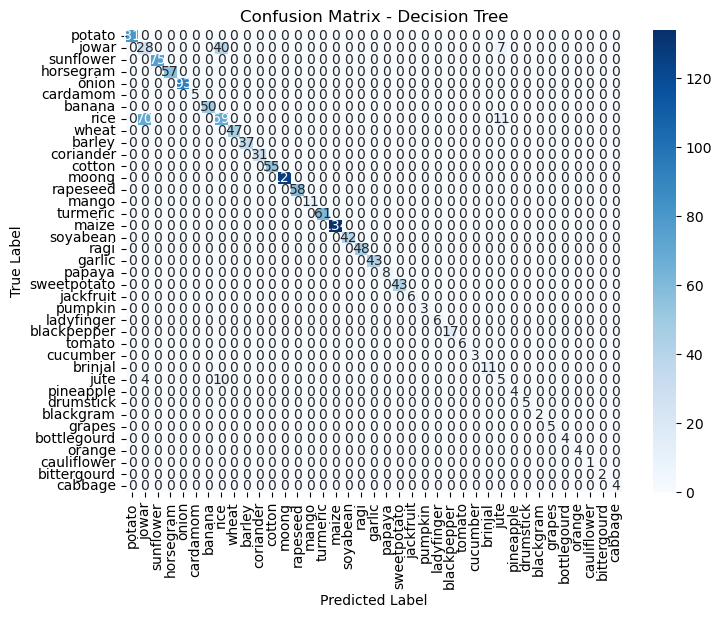



----- Random Forest Evaluation -----
Accuracy: 0.9051

Classification Report:
              precision    recall  f1-score   support

      potato       1.00      1.00      1.00        81
       jowar       0.27      0.28      0.27        75
   sunflower       1.00      1.00      1.00        75
   horsegram       1.00      1.00      1.00        57
       onion       1.00      1.00      1.00        93
    cardamom       1.00      1.00      1.00         5
      banana       1.00      1.00      1.00        50
        rice       0.57      0.57      0.57       150
       wheat       1.00      1.00      1.00        47
      barley       1.00      1.00      1.00        37
   coriander       1.00      1.00      1.00        31
      cotton       1.00      1.00      1.00        55
       moong       1.00      1.00      1.00       127
    rapeseed       1.00      1.00      1.00        58
       mango       1.00      1.00      1.00        11
    turmeric       1.00      1.00      1.00        61
 

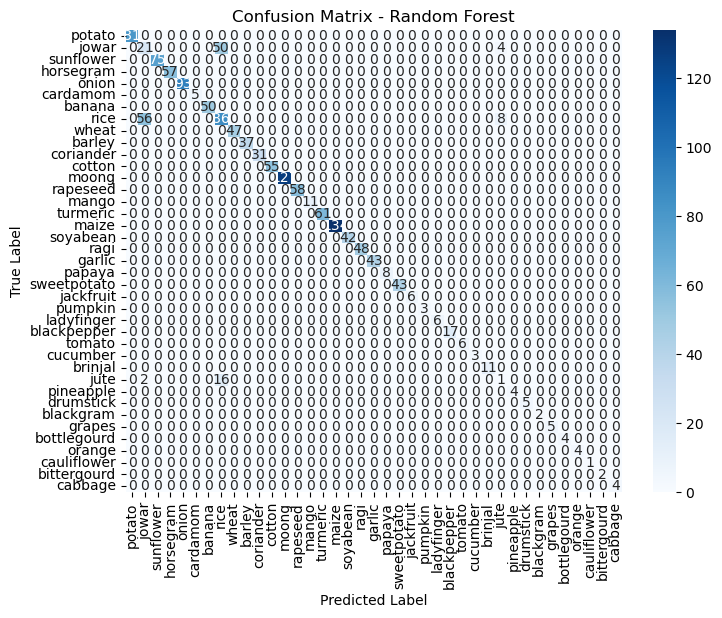



----- Gaussian Naive Bayes Evaluation -----
Accuracy: 0.9330

Classification Report:
              precision    recall  f1-score   support

      potato       1.00      1.00      1.00        81
       jowar       0.00      0.00      0.00        75
   sunflower       1.00      1.00      1.00        75
   horsegram       1.00      1.00      1.00        57
       onion       1.00      1.00      1.00        93
    cardamom       1.00      1.00      1.00         5
      banana       1.00      1.00      1.00        50
        rice       0.61      1.00      0.76       150
       wheat       1.00      1.00      1.00        47
      barley       1.00      1.00      1.00        37
   coriander       1.00      1.00      1.00        31
      cotton       1.00      1.00      1.00        55
       moong       1.00      1.00      1.00       127
    rapeseed       1.00      0.97      0.98        58
       mango       1.00      1.00      1.00        11
    turmeric       1.00      1.00      1.00     

C:\Users\user\anaconda3\envs\Datahaul\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\user\anaconda3\envs\Datahaul\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\user\anaconda3\envs\Datahaul\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


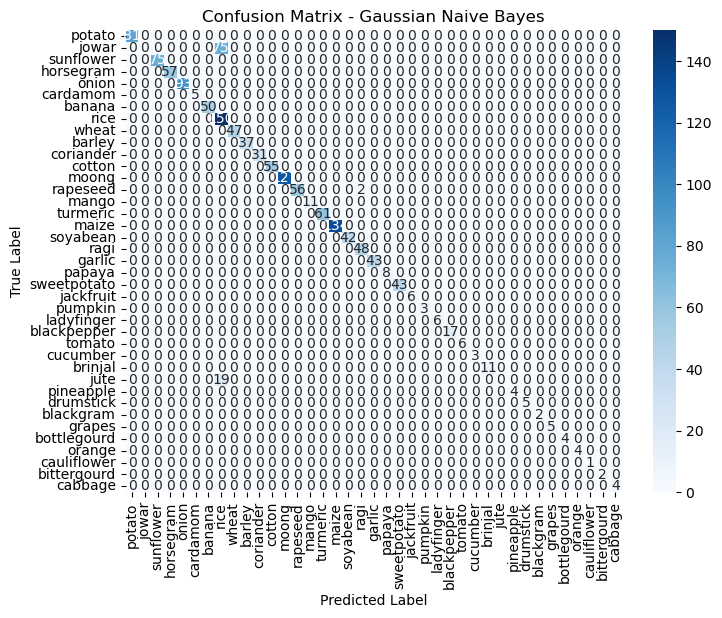



----- SVM Evaluation -----
Accuracy: 0.9218

Classification Report:
              precision    recall  f1-score   support

      potato       1.00      1.00      1.00        81
       jowar       0.00      0.00      0.00        75
   sunflower       0.97      1.00      0.99        75
   horsegram       1.00      1.00      1.00        57
       onion       1.00      1.00      1.00        93
    cardamom       1.00      1.00      1.00         5
      banana       1.00      1.00      1.00        50
        rice       0.61      1.00      0.76       150
       wheat       1.00      1.00      1.00        47
      barley       1.00      0.97      0.99        37
   coriander       0.91      1.00      0.95        31
      cotton       1.00      1.00      1.00        55
       moong       1.00      1.00      1.00       127
    rapeseed       1.00      0.98      0.99        58
       mango       1.00      1.00      1.00        11
    turmeric       1.00      1.00      1.00        61
       maiz

C:\Users\user\anaconda3\envs\Datahaul\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\user\anaconda3\envs\Datahaul\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\user\anaconda3\envs\Datahaul\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


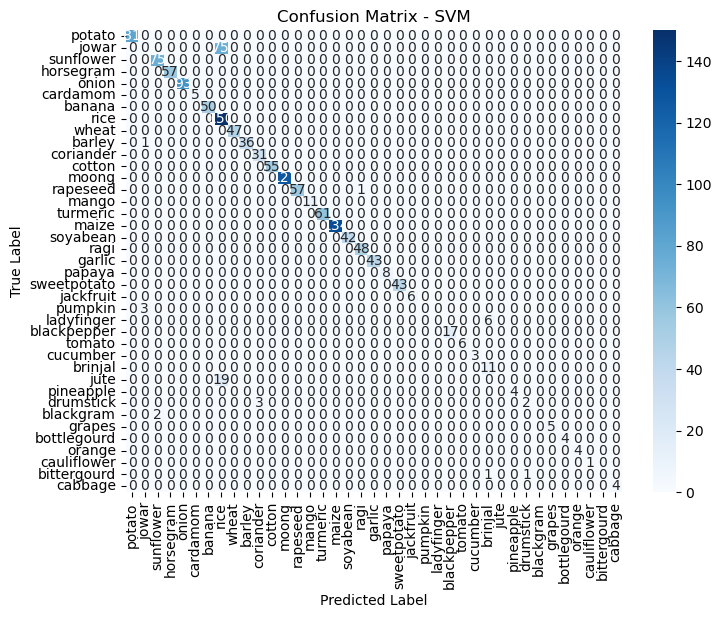

In [33]:
def evaluate_model(model_name, true_labels, predictions, original_test_labels):
    print(f"----- {model_name} Evaluation -----")
    accuracy = accuracy_score(true_labels, predictions)
    print(f"Accuracy: {accuracy:.4f}")

    # Get the unique class names from the original test labels
    unique_test_classes = original_test_labels.unique()

    # Get the corresponding encoded labels for these classes
    encoded_labels = label_encoder.transform(unique_test_classes)

    print("\nClassification Report:")
    print(classification_report(true_labels, predictions, labels=encoded_labels, target_names=unique_test_classes))

    cm = confusion_matrix(true_labels, predictions, labels=encoded_labels)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=unique_test_classes, yticklabels=unique_test_classes)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()
    print("\n")

# Evaluate each model (make sure to pass the original y_test)
evaluate_model("Logistic Regression", y_test_encoded, logistic_predictions, y_test)
evaluate_model("Decision Tree", y_test_encoded, tree_predictions, y_test)
evaluate_model("Random Forest", y_test_encoded, forest_predictions, y_test)
evaluate_model("Gaussian Naive Bayes", y_test_encoded, naive_bayes_predictions, y_test)
evaluate_model("SVM", y_test_encoded, svm_predictions, y_test)

## Preparing my Unseen test dataset

In [34]:
df_2 = pd.read_csv('C:/Users/user/Desktop/Crop reccommender/Crop Recommendation dataset/Train Dataset.csv')
df_2.head()

,Unnamed: 0,Crop,N,P,K,pH,rainfall,temperature
0,10182,barley,70,40,45,5.54,75.32,22.676000
1,16280,sunflower,50,60,30,5.54,297.66,29.566667
2,54944,sweetpotato,90,20,120,5.02,689.88,29.037273
3,98212,rice,80,40,40,5.66,297.66,29.566667
4,52108,soyabean,20,60,20,5.38,1011.49,30.430000


In [35]:
df_2 = df_2.drop('Unnamed: 0', axis = 1)

In [36]:
df_2.head()

,Crop,N,P,K,pH,rainfall,temperature
0,barley,70,40,45,5.54,75.32,22.676000
1,sunflower,50,60,30,5.54,297.66,29.566667
2,sweetpotato,90,20,120,5.02,689.88,29.037273
3,rice,80,40,40,5.66,297.66,29.566667
4,soyabean,20,60,20,5.38,1011.49,30.430000


In [37]:
missing = df_2.isnull().sum()
print(missing)

Crop           0
N              0
P              0
K              0
pH             0
rainfall       0
temperature    0
dtype: int64


In [38]:
X_unseen = df_2.drop('Crop', axis = 1)
X_unseen_scaled  = scaler.transform(X_unseen) 

In [39]:
# Make predictions using your trained models
logistic_predictions_unseen = logistic_model.predict(X_unseen_scaled)
tree_predictions_unseen = tree_model.predict(X_unseen_scaled)
forest_predictions_unseen = forest_model.predict(X_unseen_scaled)
naive_bayes_predictions_unseen = naive_bayes_model.predict(X_unseen_scaled)
svm_predictions_unseen = svm_model.predict(X_unseen_scaled)

print("\nLogistic Regression Predictions on Unseen Data:", logistic_predictions_unseen[:10])
print("Decision Tree Predictions on Unseen Data:", tree_predictions_unseen[:10])


Logistic Regression Predictions on Unseen Data: [33 35 36 33 34 33 28 33 38 33]
Decision Tree Predictions on Unseen Data: [ 1 35 36 18 34 18 28 19 38 19]



--- Evaluation on Unseen Data ---
----- Logistic Regression (Unseen) Evaluation -----
Accuracy: 0.8380

Classification Report:
              precision    recall  f1-score   support

      barley       0.83      0.17      0.28       654
   sunflower       0.91      1.00      0.95       737
 sweetpotato       1.00      1.00      1.00       576
        rice       0.54      0.99      0.70      2245
    soyabean       1.00      0.86      0.92       442
       jowar       0.00      0.00      0.00      1055
      potato       1.00      1.00      1.00      1083
    turmeric       0.94      1.00      0.97       528
        jute       0.00      0.00      0.00       211
       maize       0.78      1.00      0.88      1976
       moong       0.93      0.99      0.96      1327
       onion       0.90      1.00      0.95      1047
     cabbage       0.00      0.00      0.00        26
        ragi       0.17      0.01      0.02       557
      banana       0.96      1.00      0.98       507
    rap

C:\Users\user\anaconda3\envs\Datahaul\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\user\anaconda3\envs\Datahaul\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\user\anaconda3\envs\Datahaul\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


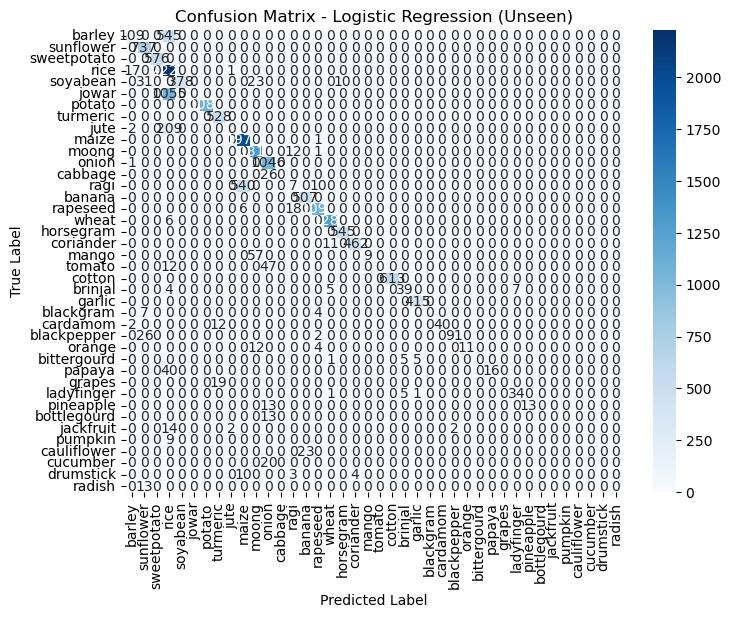



----- Decision Tree (Unseen) Evaluation -----
Accuracy: 0.9328

Classification Report:
              precision    recall  f1-score   support

      barley       1.00      1.00      1.00       654
   sunflower       1.00      1.00      1.00       737
 sweetpotato       1.00      1.00      1.00       576
        rice       0.89      0.56      0.69      2245
    soyabean       1.00      1.00      1.00       442
       jowar       0.50      0.85      0.63      1055
      potato       1.00      1.00      1.00      1083
    turmeric       1.00      1.00      1.00       528
        jute       0.46      0.64      0.53       211
       maize       1.00      1.00      1.00      1976
       moong       1.00      1.00      1.00      1327
       onion       1.00      1.00      1.00      1047
     cabbage       1.00      1.00      1.00        26
        ragi       1.00      1.00      1.00       557
      banana       1.00      1.00      1.00       507
    rapeseed       1.00      1.00      1.00   

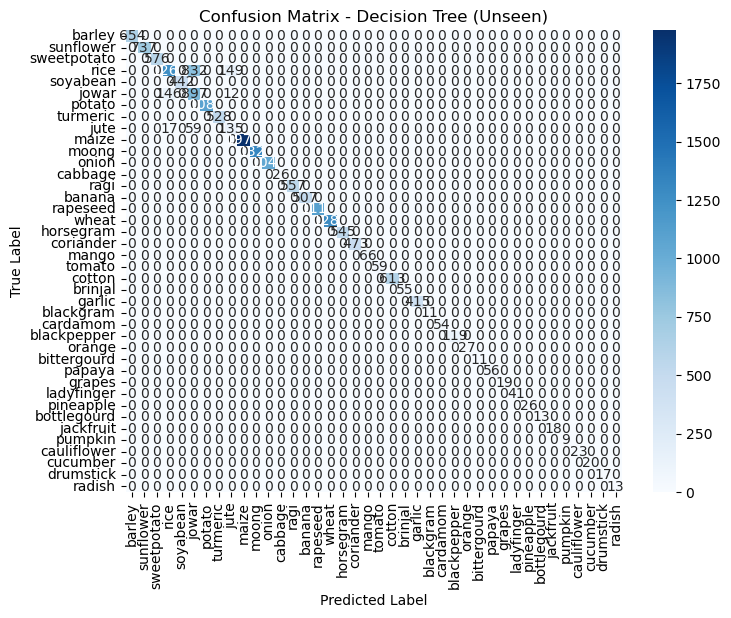



----- Random forest (Unseen) Evaluation -----
Accuracy: 0.9371

Classification Report:
              precision    recall  f1-score   support

      barley       1.00      1.00      1.00       654
   sunflower       1.00      1.00      1.00       737
 sweetpotato       1.00      1.00      1.00       576
        rice       0.77      0.73      0.75      2245
    soyabean       1.00      1.00      1.00       442
       jowar       0.55      0.62      0.58      1055
      potato       1.00      1.00      1.00      1083
    turmeric       1.00      1.00      1.00       528
        jute       0.41      0.38      0.39       211
       maize       1.00      1.00      1.00      1976
       moong       1.00      1.00      1.00      1327
       onion       1.00      1.00      1.00      1047
     cabbage       1.00      1.00      1.00        26
        ragi       1.00      1.00      1.00       557
      banana       1.00      1.00      1.00       507
    rapeseed       1.00      1.00      1.00   

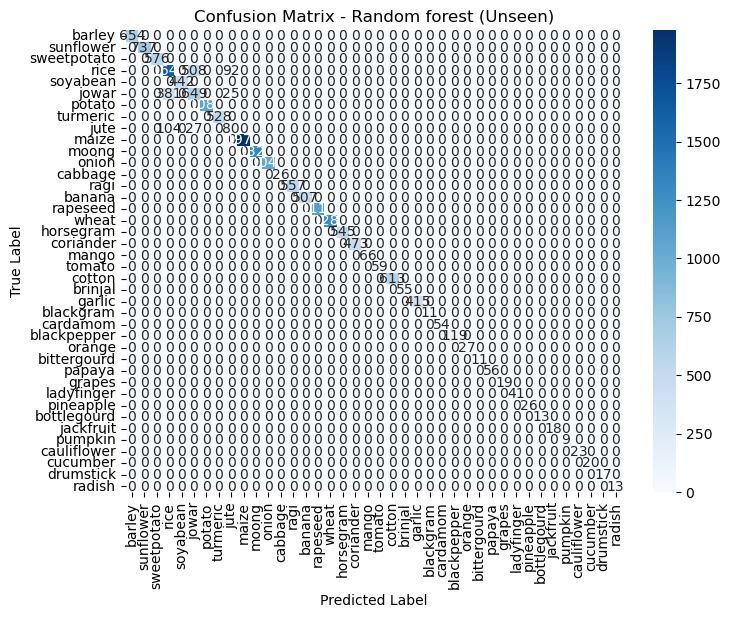



----- Naives bayes (Unseen) Evaluation -----
Accuracy: 0.9294

Classification Report:
              precision    recall  f1-score   support

      barley       1.00      1.00      1.00       654
   sunflower       1.00      1.00      1.00       737
 sweetpotato       1.00      1.00      1.00       576
        rice       0.64      1.00      0.78      2245
    soyabean       1.00      1.00      1.00       442
       jowar       0.00      0.00      0.00      1055
      potato       1.00      1.00      1.00      1083
    turmeric       1.00      1.00      1.00       528
        jute       0.00      0.00      0.00       211
       maize       1.00      1.00      1.00      1976
       moong       1.00      1.00      1.00      1327
       onion       1.00      1.00      1.00      1047
     cabbage       1.00      1.00      1.00        26
        ragi       0.98      1.00      0.99       557
      banana       1.00      1.00      1.00       507
    rapeseed       1.00      0.99      1.00    

C:\Users\user\anaconda3\envs\Datahaul\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\user\anaconda3\envs\Datahaul\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\user\anaconda3\envs\Datahaul\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


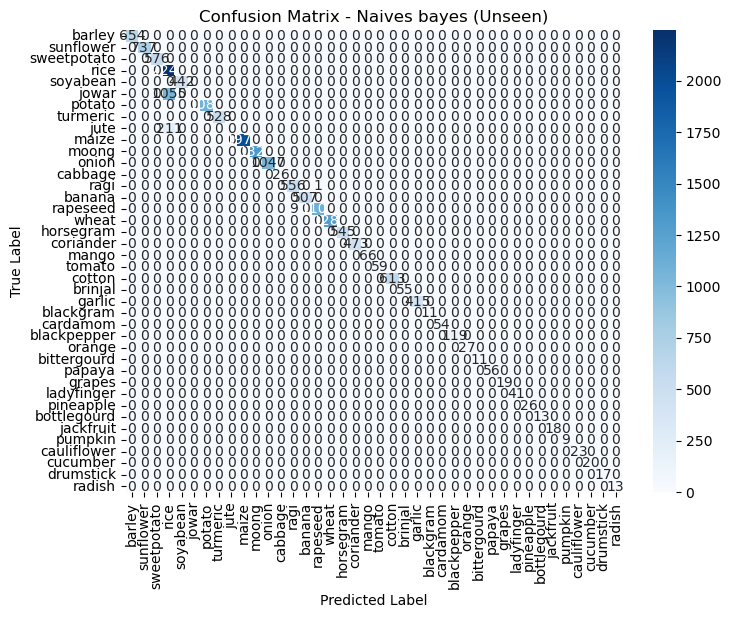



----- SVM (Unseen) Evaluation -----
Accuracy: 0.9254

Classification Report:
              precision    recall  f1-score   support

      barley       1.00      0.98      0.99       654
   sunflower       0.99      1.00      1.00       737
 sweetpotato       1.00      1.00      1.00       576
        rice       0.64      1.00      0.78      2245
    soyabean       1.00      1.00      1.00       442
       jowar       0.00      0.00      0.00      1055
      potato       1.00      1.00      1.00      1083
    turmeric       1.00      1.00      1.00       528
        jute       0.00      0.00      0.00       211
       maize       1.00      1.00      1.00      1976
       moong       1.00      1.00      1.00      1327
       onion       1.00      1.00      1.00      1047
     cabbage       1.00      1.00      1.00        26
        ragi       1.00      1.00      1.00       557
      banana       1.00      1.00      1.00       507
    rapeseed       1.00      1.00      1.00      1118
  

C:\Users\user\anaconda3\envs\Datahaul\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\user\anaconda3\envs\Datahaul\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\user\anaconda3\envs\Datahaul\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


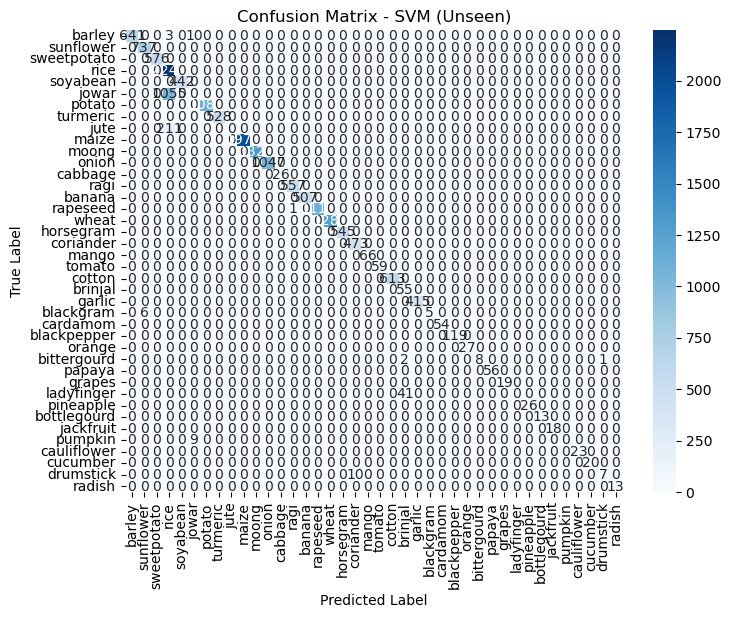

In [40]:
if 'Crop' in df_2.columns:
    y_unseen = df_2['Crop']
    y_unseen_encoded = label_encoder.transform(y_unseen)

    print("\n--- Evaluation on Unseen Data ---")
    evaluate_model("Logistic Regression (Unseen)", y_unseen_encoded, logistic_predictions_unseen, y_unseen)
    evaluate_model("Decision Tree (Unseen)", y_unseen_encoded, tree_predictions_unseen, y_unseen)
    evaluate_model("Random forest (Unseen)", y_unseen_encoded, forest_predictions_unseen, y_unseen)
    evaluate_model("Naives bayes (Unseen)", y_unseen_encoded, naive_bayes_predictions_unseen, y_unseen)
    evaluate_model("SVM (Unseen)", y_unseen_encoded, svm_predictions_unseen, y_unseen)
    
else:
    print("\n--- Predictions on Unseen Data (True labels not available) ---")

## Saving our best model, Label encoder and Scaler

In [42]:
model_file_path = 'Crop_Recommender_model.pkl'
with open(model_file_path , 'wb') as file:
    pickle.dump(tree_model,file)

with open('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

with open('label_encoder.pkl', 'wb') as le_file:
    pickle.dump(label_encoder, le_file)

## Opening the saved files

In [46]:
# Load the trained model
try:
    with open('Crop_Recommender_model.pkl', 'rb') as file:
        model = pickle.load(file)
except FileNotFoundError:
    print("Error: 'crop_recommendation_model.pkl' not found.")
    model = None

# Load the StandardScaler
try:
    with open('scaler.pkl', 'rb') as scaler_file:
        scaler = pickle.load(scaler_file)
except FileNotFoundError:
    print("Error: 'scaler.pkl' not found.")
    scaler = None

# Load the LabelEncoder for the target variable (if you want to return crop names)
try:
    with open('label_encoder.pkl', 'rb') as le_file:
        label_encoder = pickle.load(le_file)
except FileNotFoundError:
    print("Error: 'label_encoder_y.pkl' not found.")
    label_encoder = None

## Prediction Function

In [45]:
def predict_crop(n, p, k, temperature, humidity):
    """
    Predicts the recommended crop based on input features.

    Args:
        n (float): Nitrogen level in the soil.
        p (float): Phosphorus level in the soil.
        k (float): Potassium level in the soil.
        temperature (float): Temperature in Celsius.
        pH (float): pH level.

    Returns:
        str or int: The predicted crop name (if label_encoder_y is loaded) or the encoded label.
                     Returns None if the model or scaler is not loaded.
    """
    if model is None or scaler is None:
        return None

    # Create a Pandas DataFrame from the input features
    input_data = pd.DataFrame({
        'N': [n],
        'P': [p],
        'K': [k],
        'pH': [pH],
        'temperature': [temperature],
        'rainfall': [rainfall]
    })

    # Ensure the order of columns matches the training data
    input_data = input_data[['N', 'P', 'K', 'pH', 'rainfall', 'temperature']]

    # Scale the numerical features using the *fitted* scaler
    scaled_input = scaler.transform(input_data)

    # Make the prediction
    prediction_encoded = model.predict(scaled_input)[0]

    # Decode the prediction to get the crop name (if label encoder is available)
    if label_encoder:
        predicted_crop = label_encode.inverse_transform([prediction_encoded])[0]
        return predicted_crop
    else:
        return prediction_encoded